# 简介
1. Pandas的一些内容
2. Matplotlib.pyplot的一些绘图内容

# 主要内容

## Pandas

### 3.3 Pandas设置值
如何给指定的位置赋值？
继续以上一次的df为例

In [65]:
import pandas as pd
import numpy as np

In [66]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])

我们可以用`.iloc[]`改变指定行、列的值

In [67]:
df.iloc[2,2] = 1111
print(df)

             A   B     C   D
2013-01-01   0   1     2   3
2013-01-02   4   5     6   7
2013-01-03   8   9  1111  11
2013-01-04  12  13    14  15
2013-01-05  16  17    18  19
2013-01-06  20  21    22  23


也可以用`.loc[]`改变指定标签组合的值

In [68]:
df.loc['20130101','B']=222
print(df)

             A    B     C   D
2013-01-01   0  222     2   3
2013-01-02   4    5     6   7
2013-01-03   8    9  1111  11
2013-01-04  12   13    14  15
2013-01-05  16   17    18  19
2013-01-06  20   21    22  23


我们也可以指定按照元素的取值，改变某一取值范围内的元素

In [69]:
#df[df.A>4]=0
print(df)

             A    B     C   D
2013-01-01   0  222     2   3
2013-01-02   4    5     6   7
2013-01-03   8    9  1111  11
2013-01-04  12   13    14  15
2013-01-05  16   17    18  19
2013-01-06  20   21    22  23


上述`df.A>4`得到了`A`这一列中元素值大于4的那些行

然后`df[df.A>4]=0`即使那些行的值都为0

若只想对A这一列中大于4的元素进行修改，可用`df.A[df.A>4]=0`

In [70]:
df.A[df.A>4]=0
print(df)

            A    B     C   D
2013-01-01  0  222     2   3
2013-01-02  4    5     6   7
2013-01-03  0    9  1111  11
2013-01-04  0   13    14  15
2013-01-05  0   17    18  19
2013-01-06  0   21    22  23


In [71]:
df.C[df.B>4]=0
print(df)

            A    B  C   D
2013-01-01  0  222  0   3
2013-01-02  4    5  0   7
2013-01-03  0    9  0  11
2013-01-04  0   13  0  15
2013-01-05  0   17  0  19
2013-01-06  0   21  0  23


In [72]:
#df['F']=np.nan
print(df)

            A    B  C   D
2013-01-01  0  222  0   3
2013-01-02  4    5  0   7
2013-01-03  0    9  0  11
2013-01-04  0   13  0  15
2013-01-05  0   17  0  19
2013-01-06  0   21  0  23


In [73]:
df['E']=pd.Series([1,2,3,4,5,6],index=pd.date_range('20130101',periods=6))


In [74]:
df.sort_index(axis=1, ascending=True)


,A,B,C,D,E
2013-01-01,0,222,0,3,1
2013-01-02,4,5,0,7,2
2013-01-03,0,9,0,11,3
2013-01-04,0,13,0,15,4
2013-01-05,0,17,0,19,5
2013-01-06,0,21,0,23,6


### 3.4 Pandas处理丢失数据
若是矩阵中有消失的数据，常用`np.nan`代替

In [75]:
df

,A,B,C,D,E
2013-01-01,0,222,0,3,1
2013-01-02,4,5,0,7,2
2013-01-03,0,9,0,11,3
2013-01-04,0,13,0,15,4
2013-01-05,0,17,0,19,5
2013-01-06,0,21,0,23,6


In [76]:
df.iloc[0, 1] = np.nan
df.iloc[1, 2] = np.nan

df

,A,B,C,D,E
2013-01-01,0,NaN,0.0,3,1
2013-01-02,4,5.0,NaN,7,2
2013-01-03,0,9.0,0.0,11,3
2013-01-04,0,13.0,0.0,15,4
2013-01-05,0,17.0,0.0,19,5
2013-01-06,0,21.0,0.0,23,6


为了处理丢失的数据，可以使用`.dropna(axis=0/1, how')`抛弃含确实数据的行/列。

`axis`指定丢弃行/列，`how`指定丢弃方式。

`any`行/列如果出现丢失数据就抛弃；`all`行/列全为丢失数据就抛弃

In [77]:
print(df.dropna(axis = 0, how = 'any'))
#丢掉了含缺失项的行

            A     B    C   D  E
2013-01-03  0   9.0  0.0  11  3
2013-01-04  0  13.0  0.0  15  4
2013-01-05  0  17.0  0.0  19  5
2013-01-06  0  21.0  0.0  23  6


若我们想利用包含缺失项的行/列，将其填充为0/1，就可以使用`.fillna(value)`，value为指定值。

In [78]:
print(df)
print(df.fillna(value=0))


            A     B    C   D  E
2013-01-01  0   NaN  0.0   3  1
2013-01-02  4   5.0  NaN   7  2
2013-01-03  0   9.0  0.0  11  3
2013-01-04  0  13.0  0.0  15  4
2013-01-05  0  17.0  0.0  19  5
2013-01-06  0  21.0  0.0  23  6
            A     B    C   D  E
2013-01-01  0   0.0  0.0   3  1
2013-01-02  4   5.0  0.0   7  2
2013-01-03  0   9.0  0.0  11  3
2013-01-04  0  13.0  0.0  15  4
2013-01-05  0  17.0  0.0  19  5
2013-01-06  0  21.0  0.0  23  6


若我们要检查是否有缺失数据，可以使用`.isnull()`来判断

In [79]:
print(df.isnull())

                A      B      C      D      E
2013-01-01  False   True  False  False  False
2013-01-02  False  False   True  False  False
2013-01-03  False  False  False  False  False
2013-01-04  False  False  False  False  False
2013-01-05  False  False  False  False  False
2013-01-06  False  False  False  False  False


若矩阵过于庞大，可用`np.any(df.isnull())==True`来判断，若有至少一个丢失的数据，则会返回True

In [80]:
print(np.any(df.isnull())==True)

True


### 3.5 Pandas导入导出
在`pandas`中如何导入和导出数据。

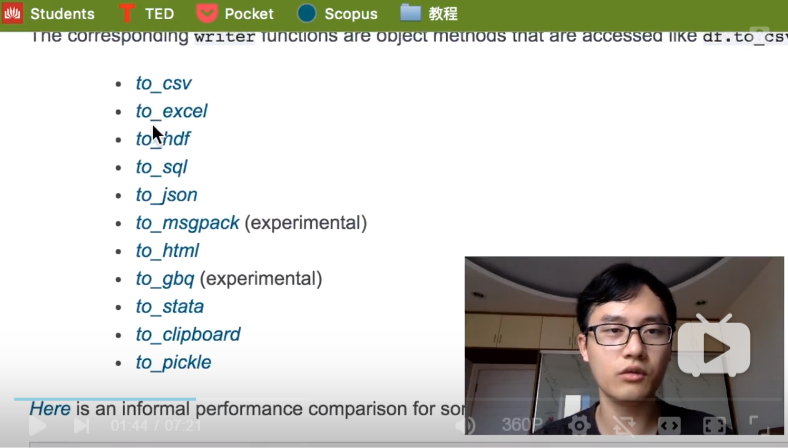
推荐使用`read_csv`，csv是最基础简单的数据存储格式。

也可以使用`read_pickle`

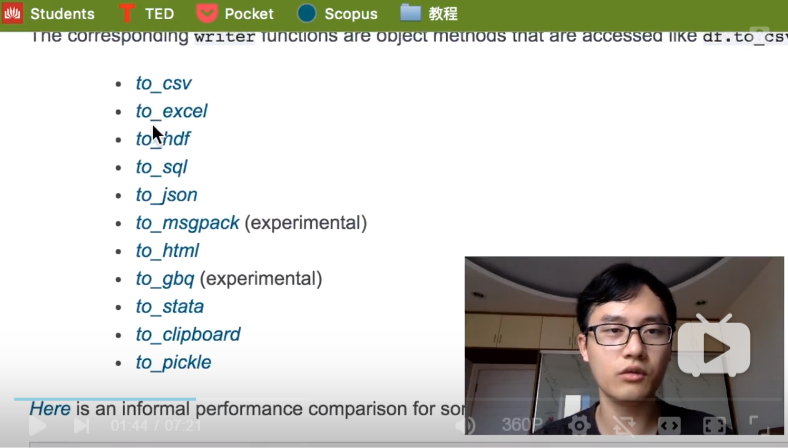
`to_`是对应`read_`的方法

`csv`可以可视化，而`pickle`的数据无法阅读

`read_csv`也可以读取.txt文件

In [81]:
import pandas as pd

data = pd.read_csv('student.csv')
print(data)

    Student   name  age  gender
0      1100  Kelly    1    Male
1      1101    Clo    2  Female
2      1102  Tilly    3    Male
3      1103   Tony    4  Female
4      1104  David    5    Male
5      1105  Catty    6  Female
6      1106      M    7    Male
7      1107      N    8  Female
8      1108      A    9    Male
9      1109      S   10  Female
10     1110  David   11    Male
11     1111     Dw   12  Female
12     1112      Q   13    Male
13     1113      W   14  Female


In [82]:
data.to_pickle('student.pickle')

可见，pandas导入导出非常简单。

### 3.6 Pandas合并concat
本次用到的函数是`pd.concat`

In [83]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])
print(df1)
print(df2)
print(df3)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
     a    b    c    d
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


对于例子中的数据，由于列的属性相同，我们可以横向合并

In [84]:
res = pd.concat([df1,df2,df3],axis=0)
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0


这里行索引重复，我们可以在`pd.concat`使用`ignore_index`

In [85]:
res = pd.concat([df1,df2,df3],axis=0,ignore_index=True)
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0
8,2.0,2.0,2.0,2.0


下面介绍一个函数`join, ['inner','outer']`

In [86]:
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'],index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'],index=[2,3,4])
print(df1)
print(df2)

     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0


上面列索引不一样，`join`可以将它们包含在一起

若直接合并，会出现缺失项`NaN`。

In [87]:
res = pd.concat([df1,df2])
res

,a,b,c,d,e
1,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,NaN
2,NaN,1.0,1.0,1.0,1.0
3,NaN,1.0,1.0,1.0,1.0
4,NaN,1.0,1.0,1.0,1.0


以上这是默认的一种join模式。等同于`res = pd.concat([df1,df2],join='outer')`

而`inner`则会将不匹配的删除。

如下所示

In [88]:
res = pd.concat([df1,df2],join='inner')
res

,b,c,d
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


若有重新排行索引，仍可使用`ignore_index`

In [89]:
res = pd.concat([df1,df2],join='inner',ignore_index=True)
res

,b,c,d
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0
5,1.0,1.0,1.0


`join_axes`指定按照哪个矩阵的索引来合并，缺失数据用NaN填充。

In [90]:
res = pd.concat([df1,df2],axis=1,join_axes=[df1.index])
res

,a,b,c,d,b,c,d,e
1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


如上，按`df1.index`来合并，则df2中第一行的缺失数据由NaN填充，而df2的第4行则被丢弃。

若不进行这样的处理，则两者的index都被考虑。

In [91]:
res = pd.concat([df1,df2],axis=1)
res

,a,b,c,d,b,c,d,e
1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0


通过`append`在下面添加新的DF

In [92]:
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'],index=[2,3,4])

res = df1.append(df2,ignore_index=True)

res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0


若要append更多DF，则需要用列表(List)

In [93]:
res = df1.append([df2,df2], ignore_index=True) #使用List
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0


In [94]:
s1 = pd.Series([1,2,3,4],index=['a','b','c','d'])
res = df1.append(s1,ignore_index=True)
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,2.0,3.0,4.0


### 3.7 pandas合并merge

`concat`相对`merge`是一种比较简单的合并方式。

In [95]:
import pandas as pd

left = pd.DataFrame({'key':['K0','K1','K2','K3'],
                    'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3']})

right = pd.DataFrame({'key':['K0','K1','K2','K3'],
                    'C':['C0','C1','C2','C3'],
                    'D':['D0','D1','D2','D3']})
print(left)
print(right)

    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K2
3  A3  B3  K3
    C   D key
0  C0  D0  K0
1  C1  D1  K1
2  C2  D2  K2
3  C3  D3  K3


In [96]:
res = pd.merge(left, right, on='key')
res

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


上述例子通过两个DataFrame相同的列进行合并

In [97]:
left = pd.DataFrame({'key1':['K0','K0','K1','K2'],
                     'key2':['K0','K1','K0','K1'],
                    'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3']})

right = pd.DataFrame({'key1':['K0','K1','K1','K2'],
                      'key2':['K0','K0','K0','K0'],
                    'C':['C0','C1','C2','C3'],
                    'D':['D0','D1','D2','D3']})

print(left)
print(right)

    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1
    C   D key1 key2
0  C0  D0   K0   K0
1  C1  D1   K1   K0
2  C2  D2   K1   K0
3  C3  D3   K2   K0


In [98]:
res = pd.merge(left, right, on=['key1','key2'])
res

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2


上述的合并是默认的`how=inner`模式，只保留了`key1`和`key2`两列中元素相同的行

而`how`模式一共有4种，`['left','right','inner','outer']`

In [99]:
res = pd.merge(left, right, on=['key1','key2'],how='outer')
res

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN
5,NaN,NaN,K2,K0,C3,D3


`outer`模式，合并后不存在的项用`NaN`填充

In [100]:
print(left)
print(right)
res = pd.merge(left, right, on=['key1','key2'],how='right')
res

    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1
    C   D key1 key2
0  C0  D0   K0   K0
1  C1  D1   K1   K0
2  C2  D2   K1   K0
3  C3  D3   K2   K0


,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2
3,NaN,NaN,K2,K0,C3,D3


上述例子中，res以`right`DataFrame中的`key1`和`key2`两列为合并的基准。

在`left`里取与`right`在`key1`,`key2`两列里元素相同的行（在`right`里依行取），若`left`中不存在则用`NaN`填充。

下面介绍`indicator`参数

In [101]:
df1 = pd.DataFrame({'col1':[0,1],
                    'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],
                    'col_right':[2,2,2]})
print(df1)
print(df2)
res = pd.merge(df1,df2,on='col1',how='outer',indicator=True)
print(res)


   col1 col_left
0     0        a
1     1        b
   col1  col_right
0     1          2
1     2          2
2     2          2
   col1 col_left  col_right      _merge
0     0        a        NaN   left_only
1     1        b        2.0        both
2     2      NaN        2.0  right_only
3     2      NaN        2.0  right_only


`indicator`显示当前行是如何合并的

In [102]:
res = pd.merge(df1,df2,on='col1',how='outer',indicator='indicator_column')
res


,col1,col_left,col_right,indicator_column
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


如果在`indicator`里输入字符串，则可以更改`indicator`列的名称

我们也可以按`index`来merge

In [103]:
left = pd.DataFrame({'A':['A0','A1','A2'],
                    'B':['B0','B1','B2']},
                   index=['K0','K1','K2'])

right = pd.DataFrame({'C':['C0','C2','C3'],
                     'D':['D0','D2','D3']},
                    index=['K0','K2','K3'])

print(left)
print(right)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3


In [104]:
res = pd.merge(left,right,left_index=True,right_index=True,how='outer')
res

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


`left_index`和`right_index`默认的值都是`None`，如果我们将其设置为`True`，就意味着在merge过程中我们考虑的不是column，而是`index`，我们以此换了一个方向

现在我们考虑`Overlapping`的情况

In [105]:
boys = pd.DataFrame({'k':['K0','K1','K2'],'age':[1,2,3]})
print(boys)
girls = pd.DataFrame({'k':['K0','K0','K3'],'age':[4,5,6]})
print(girls)
res = pd.merge(boys,girls,on='k',suffixes=['_boy','_girl'],how='inner')
res

   age   k
0    1  K0
1    2  K1
2    3  K2
   age   k
0    4  K0
1    5  K0
2    6  K3


,age_boy,k,age_girl
0,1,K0,4
1,1,K0,5


通过设置`suffixes`我们给`boys`,`girls`中的`age`这个列添加一些内容。`suffixes`内的内容是按照merge的顺序附加在后面的。

### 3.8 Pandas plot画图
这一次讲关于pandas的数据可视化，如何plot我们的data

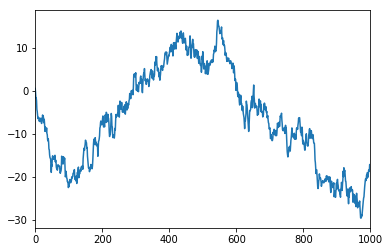

In [106]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.Series(np.random.randn(1000),index=np.arange(1000))
data = data.cumsum()
data.plot()
plt.show()

以上是一个线性的`plot`

我们还会有`DataFrame`数据的可视化

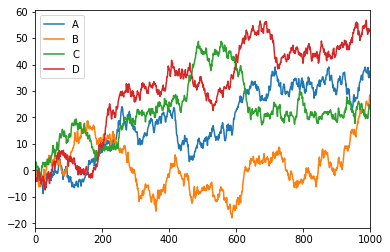

In [107]:
data = pd.DataFrame(np.random.randn(1000,4),index=np.arange(1000),columns=list('ABCD'))
data = data.cumsum()
data.head()
data.plot()
plt.show()

`.plot()`中有很多参数，可以定义粗细，颜色等等

还有另外一个常用的函数`.scatter()`，这个是绘制散点图

plot的methods:

'bar'

'hist'

'box'

'kde'

'area'

'scatter'

'hexbin'

'pie'

`scatter`只有两个属性x和y

所以我们可以用`.plot.scatter(x=A,y=B)`，这样就赋了名字


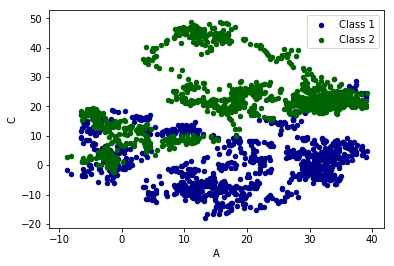

In [108]:
ax = data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class 1')
data.plot.scatter(x='A',y='C',color='DarkGreen',label='Class 2',ax=ax)
plt.show()


上一例中，通过令`ax`等于一个散点图和设置`ax`参数，我们将两幅散点图放在同一个图上

## Matplotlib
`Matplotlib`是python一个很强大的画图包，功能和`matlab`中的画图功能相似。

我们可以用matplotlib画各式各样的图，甚至可以做方程的动画。



### 2.1基本用法
这次画一个简单的线性方程的图像。

我们import的一般是matplotlib中的pyplot模块。

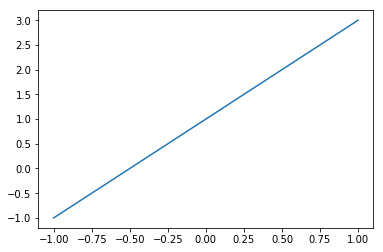

In [109]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1,1,50)
y = 2*x+1
plt.plot(x,y)
plt.show()

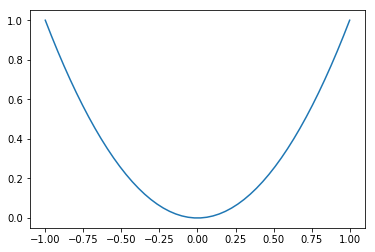

In [110]:
y=x**2
plt.plot(x,y)
plt.show()

### 2.2 figure图像
figure是图像的窗口，我们可以创建许多图像窗口

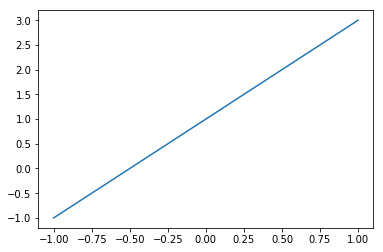

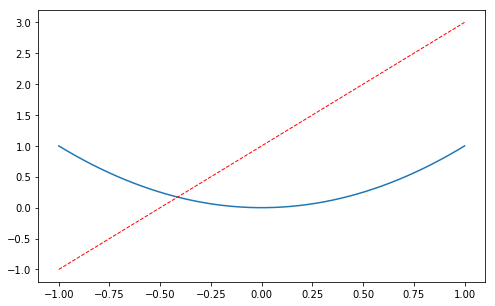

In [111]:
y1 = 2*x+1
y2 = x**2

plt.figure()
#接下来的所以的内容都是这个figure的参数和数据
#如果我们需要另一个figure，需要再来一行plt.figure()
plt.plot(x,y1)

plt.figure(num=5,figsize=(8,5))
#num可以给figure标号
#figsize可以指定figure的大小

plt.plot(x,y2)
plt.plot(x,y1,color='red',linewidth=1.0,linestyle='--')
#linewidth指定了粗细，linestyle指定了线型

plt.show()

由上可见，从一个`plt.figure()`到下一个`plt.figure()`之间的所有语句都属于上一个`plt.figure()`。

`plt.figure()`可以设定参数。

如：

`num`设定`figure`的编号；

`figsize()`设定`figure`的大小



同时`plt.plot()`也可以设定参数，

如：

`color`指定颜色；

`linewidth`指定曲线的粗细程度；

`linestyle`指定了线型。

### 2.3 设置坐标轴1
我们可以设置y轴的刻度，并添加label

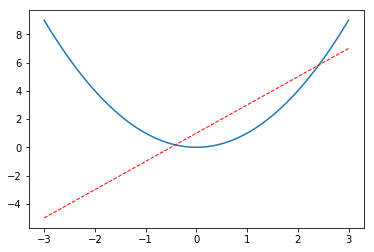

In [112]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3,3,50)
y1 = 2*x+1
y2 = x**2

plt.figure()
plt.plot(x,y2)
plt.plot(x,y1,color='red',linewidth=1.0,linestyle='--')

plt.show()

`plt.xlim()`可以设置x轴的取值范围


`plt.ylim()`可以设置y轴的取值范围

`plt.xlabel()`可以设置x轴的描述内容

`plt.ylabel()`可以设置y轴的描述内容

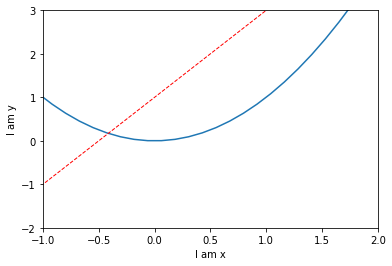

In [113]:
plt.figure()
plt.plot(x,y2)
plt.plot(x,y1,color='red',linewidth=1.0,linestyle='--')

plt.xlim((-1,2))
plt.ylim((-2,3))
plt.xlabel('I am x')
plt.ylabel('I am y')

plt.show()

`plt.xticks()`可以设置X轴的刻度

[-1.   -0.25  0.5   1.25  2.  ]


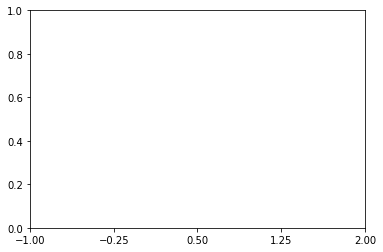

In [114]:
new_ticks = np.linspace(-1,2,5)
print(new_ticks)
plt.xticks(new_ticks)
plt.show()

通过`plt.x/yticks()`我们还可以将刻度设置为字符

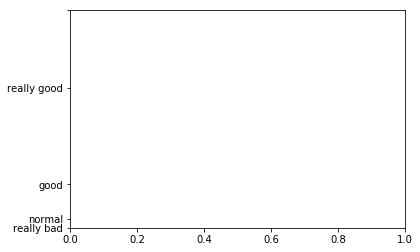

In [115]:
plt.figure()
plt.yticks([-2,-1.8,-1,1.22,3],
          ['really bad','normal','good','really good'])
plt.show()

如果想将坐标刻度值设置为字符，需要用list一一对应。

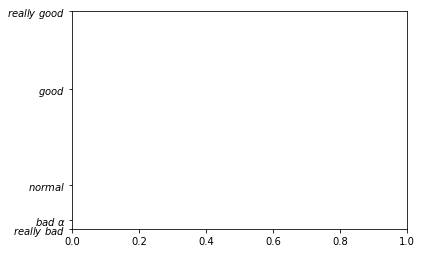

In [116]:

plt.figure()
plt.yticks([-2,-1.8,-1,1.22,3],
          [r'$really\ bad$',r'$bad\ \alpha$',r'$normal$',r'$good$',r'$really\ good$'])
plt.show()

以上例子表明，我们还可以设置字符串的字体，`$$`将字体切换到了数学字体（参照`LaTex`语法）

### 2.4 设置坐标轴2
这次我们尝试修改坐标轴的位置。

这里我们要使用`gca(get current axis)`来获取当前的坐标轴

[-1.   -0.25  0.5   1.25  2.  ]


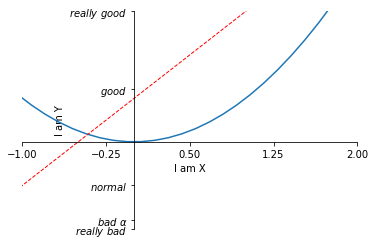

In [117]:
x = np.linspace(-3,3,50)
y1 = 2*x+1
y2 = x**2

plt.figure()
plt.plot(x,y2)
plt.plot(x,y1,color='red',linewidth=1.0,linestyle='--')

plt.xlim((-1,2))
plt.ylim((-2,3))
plt.xlabel('I am X')
plt.ylabel('I am Y')

new_ticks = np.linspace(-1,2,5)
print(new_ticks)
plt.xticks(new_ticks)
plt.yticks([-2,-1.8,-1,1.22,3],
          [r'$really\ bad$',r'$bad\ \alpha$',r'$normal$',r'$good$',r'$really\ good$'])

ax = plt.gca()

#.spines为图片的4个边框
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#默认情况严格来讲是没有设置x和y坐标轴的
#下面两行设置底边框线为X轴，左边框线为Y轴
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#挪动x轴和y轴
ax.spines['bottom'].set_position(('data',0)) #设置x轴的位置在是y轴0的位置
ax.spines['left'].set_position(('data',0)) #同理
#data的位置可以由不同的参数，如'outward','axes'等


plt.show()

上例我们将顶部和右部的边框线的颜色设置为透明。

### 2.5 Legend图例

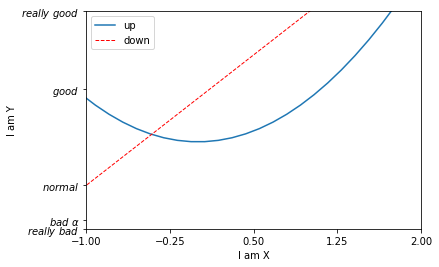

In [118]:
x = np.linspace(-3,3,50)
y1 = 2*x+1
y2 = x**2

plt.figure()


plt.xlim((-1,2))
plt.ylim((-2,3))
plt.xlabel('I am X')
plt.ylabel('I am Y')

new_ticks = np.linspace(-1,2,5)
#print(new_ticks)
plt.xticks(new_ticks)
plt.yticks([-2,-1.8,-1,1.22,3],
          [r'$really\ bad$',r'$bad\ \alpha$',r'$normal$',r'$good$',r'$really\ good$'])

#给曲线设置label
plt.plot(x,y2,label='up')
plt.plot(x,y1,color='red',linewidth=1.0,linestyle='--',label='down')

plt.legend() #默认设置

plt.show()

`plt.legend()`里面可以包含`handles=[], labels=, loc=`等参数。

`handle=[]`设置曲线

若`loc=best`，系统会找一个数据最少的地方放置图例。



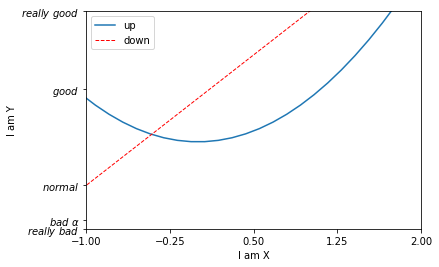

In [119]:
x = np.linspace(-3,3,50)
y1 = 2*x+1
y2 = x**2

plt.figure()


plt.xlim((-1,2))
plt.ylim((-2,3))
plt.xlabel('I am X')
plt.ylabel('I am Y')

new_ticks = np.linspace(-1,2,5)
#print(new_ticks)
plt.xticks(new_ticks)
plt.yticks([-2,-1.8,-1,1.22,3],
          [r'$really\ bad$',r'$bad\ \alpha$',r'$normal$',r'$good$',r'$really\ good$'])
'''
若要设置plt.legend()中的handles=[]，必须用以下语法
'''

#给曲线设置label
l1, = plt.plot(x,y2,label='up')
l2, = plt.plot(x,y1,color='red',linewidth=1.0,linestyle='--',label='down')


plt.legend(handles=[l1,l2,]) 

plt.show()

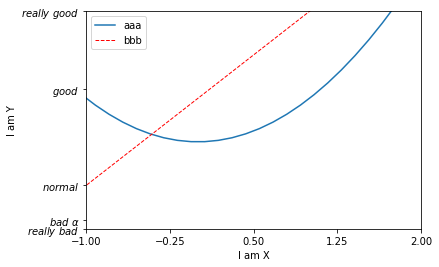

In [120]:
x = np.linspace(-3,3,50)
y1 = 2*x+1
y2 = x**2

plt.figure()


plt.xlim((-1,2))
plt.ylim((-2,3))
plt.xlabel('I am X')
plt.ylabel('I am Y')

new_ticks = np.linspace(-1,2,5)
#print(new_ticks)
plt.xticks(new_ticks)
plt.yticks([-2,-1.8,-1,1.22,3],
          [r'$really\ bad$',r'$bad\ \alpha$',r'$normal$',r'$good$',r'$really\ good$'])
'''
若要设置plt.legend()中的handles=[]，必须用以下语法
'''

#给曲线设置label
l1, = plt.plot(x,y2,label='up')
l2, = plt.plot(x,y1,color='red',linewidth=1.0,linestyle='--',label='down')

#legend处设置label，覆盖曲线原label;
#也可以不全显示所有label而只选择部分
plt.legend(handles=[l1,l2,],labels=['aaa','bbb']) 

plt.show()

### 2.6 Annotation标注
本节主要介绍如何给图片添加注解。

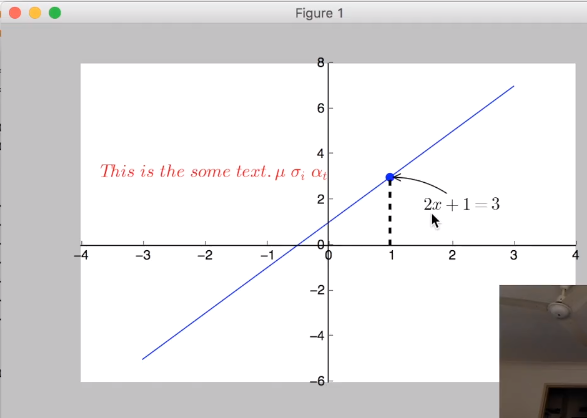
最终实现效果如上

我们先画出图像

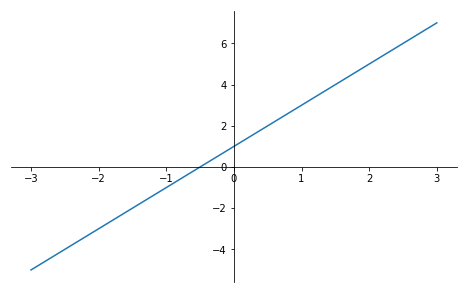

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(-3,3,50)
y = 2*x+1

plt.figure(num=1,figsize=(8,5),)
plt.plot(x,y,)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.show()


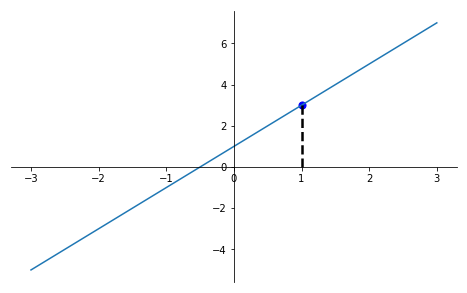

In [122]:
%matplotlib inline
x = np.linspace(-3,3,50)
y = 2*x+1

plt.figure(num=1,figsize=(8,5),)
plt.plot(x,y,)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

x0 = 1
y0 = 2*x0+1
#我们用scatter展示特殊点
plt.scatter(x0,y0,s=50,color='b')

#.plot实现的是两点间的连线，第1个list里是x坐标，第2个list里是y坐标
#k--表明黑色虚线，lw是linewidth的缩写
plt.plot([x0,x0],[y0,0],'k--',lw=2.5)



plt.show()


这样我们就实现了特殊点的标明。

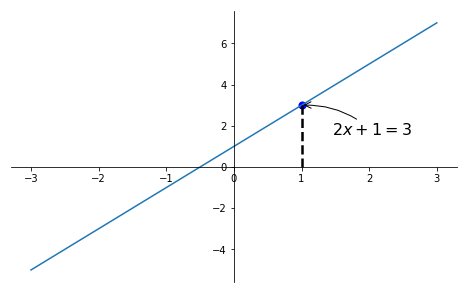

In [123]:
%matplotlib inline
x = np.linspace(-3,3,50)
y = 2*x+1

plt.figure(num=1,figsize=(8,5),)
plt.plot(x,y,)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

x0 = 1
y0 = 2*x0+1
#我们用scatter展示特殊点
plt.scatter(x0,y0,s=50,color='b')

#.plot实现的是两点间的连线，第1个list里是x坐标，第2个list里是y坐标
#k--表明黑色虚线，lw是linewidth的缩写
plt.plot([x0,x0],[y0,0],'k--',lw=2.5)


plt.annotate(r'$2x+1=%s$'%y0,xy=(x0,y0),xycoords='data',xytext=(+30,-30),textcoords='offset points',
             fontsize=16,arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2'))
#基于xycoords=data的这个xy就是标注的(x0,y0)这个点，xytext()就是注解的文字,
#"xytext=(+30,-30),textcoords='offset point'"的意思是，注解文字以注解点向右30个单位、向下30个单位的那个点为整个注解文字最左上角的点
#arrowprops是箭头，arc3表示弧度，rad表示角度

plt.show()

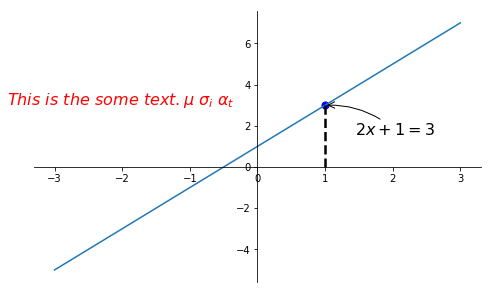

In [124]:
%matplotlib inline
x = np.linspace(-3,3,50)
y = 2*x+1

plt.figure(num=1,figsize=(8,5),)
plt.plot(x,y,)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

x0 = 1
y0 = 2*x0+1
#我们用scatter展示特殊点
plt.scatter(x0,y0,s=50,color='b')

#.plot实现的是两点间的连线，第1个list里是x坐标，第2个list里是y坐标
#k--表明黑色虚线，lw是linewidth的缩写
plt.plot([x0,x0],[y0,0],'k--',lw=2.5)


plt.annotate(r'$2x+1=%s$'%y0,xy=(x0,y0),xycoords='data',xytext=(+30,-30),textcoords='offset points',
             fontsize=16,arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2'))
#基于xycoords=data的这个xy就是标注的(x0,y0)这个点，xytext()就是注解的文字,
#"xytext=(+30,-30),textcoords='offset point'"的意思是，注解文字以注解点向右30个单位、向下30个单位的那个点为整个注解文字最左上角的点
#arrowprops是箭头，arc3表示弧度，rad表示角度

plt.text(-3.7,3,r'$This\ is\ the\ some\ text.\mu\ \sigma_i\ \alpha_t$',
        fontdict={'size':16,'color':'r'})
#-3.7,3表明文字开始的坐标。
#fontdict指明了文字的字号和颜色


plt.show()

### 2.7 tick能见度
若数据量太多，把坐标轴挡住。我们可以通过更改坐标值label能见度来处理。

如下所示。

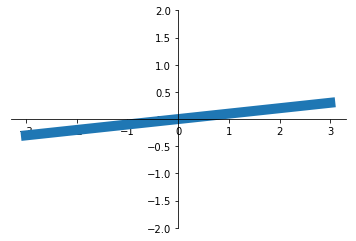

In [125]:
%matplotlib inline
x = np.linspace(-3,3,50)
y = 0.1*x

plt.figure()
plt.plot(x,y,linewidth=10)
plt.ylim(-2,2)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.show()

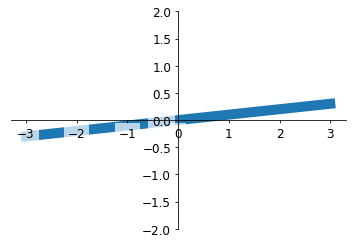

In [126]:
#%matplotlib inline

x = np.linspace(-3,3,50)
y = 0.1*x

plt.figure()
plt.plot(x,y,linewidth=10,zorder=1) 
#matplotlib 2.2.2版本之后需要设置zorder

plt.ylim(-2,2)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))


for label in ax.get_xticklabels()+ax.get_yticklabels():
    #ax.get_xticklabels()+ax.get_ytickables()是x轴和y轴的所有的label
    label.set_fontsize(12)
    #bbox设置背景的框框
    #facecolor设置正面的颜色，edgecolor设置边框的颜色
    #alpha是透明度，.plot()也可以设置这个参数
    label.set_bbox(dict(facecolor='white',edgecolor='None',alpha=0.7))

plt.show()

### 3.1 Scatter 散点图
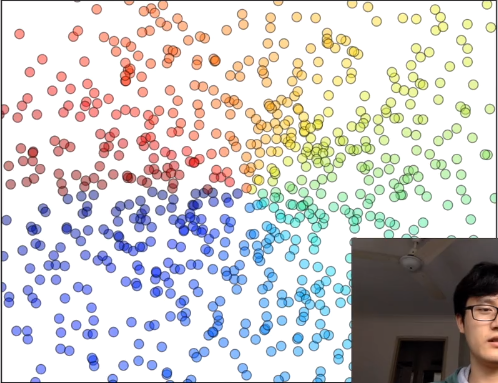
我们期望的最终实现效果如上图所示。

1024个数据点分布，分别在x轴和y轴上找1024个数。

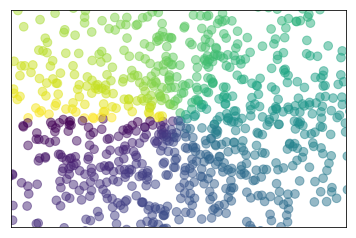

In [127]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

#点的颜色通过公式计算。计算的公式不需了解，只要了解形式即可。
#T代表颜色的数量
T = np.arctan2(Y,X)

#每个值对应到一个colormap里的值
plt.scatter(X,Y,s=75,c=T,alpha=.5)


plt.xlim((-1.5,1.5))
plt.ylim((-1.5,1.5))

#将x和y的tick设置为空
plt.xticks(())
plt.yticks(())

plt.show()

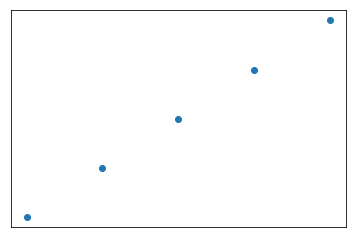

In [128]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

#点的颜色通过公式计算。计算的公式不需了解，只要了解形式即可。
#T代表颜色的数量
T = np.arctan2(Y,X)

#每个值对应到一个colormap里的值
plt.scatter(np.arange(5),np.arange(5))


#plt.xlim((-1.5,1.5))
#plt.ylim((-1.5,1.5))

#将x和y的tick设置为空
plt.xticks(())
plt.yticks(())

plt.show()